# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [2]:
! git clone https://github.com/DS3001/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 34 (delta 4), reused 1 (delta 1), pack-reused 22 (from 1)
Receiving objects: 100% (34/34), 7.18 MiB | 8.48 MiB/s, done.
Resolving deltas: 100% (7/7), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

QUESTION 1 RESPONSE

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data1 = pd.read_csv('https://raw.githubusercontent.com/vrhughes/visualization/main/assignment/data/college_completion.csv', low_memory = False)

print(data1.shape, '\n')
  # there are 3798 observations and 63 columns in our csv
print(data1.head(), '\n')

(3798, 63) 

   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ..

In [55]:
print(pd.crosstab(data1['control'], data1['level']), '\n')
print(pd.crosstab(data1['control'], data1['level'], normalize = 'all'), '\n')

# The 4 year is much more likely to be private not for profit
# Both the 2 and 4 year have relatively the same likelihood of being private for profit
# The 2 year is 8% higher when it comes to being public

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 

level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403 



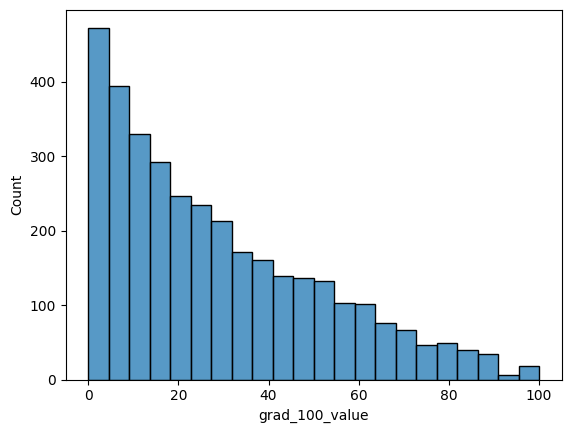

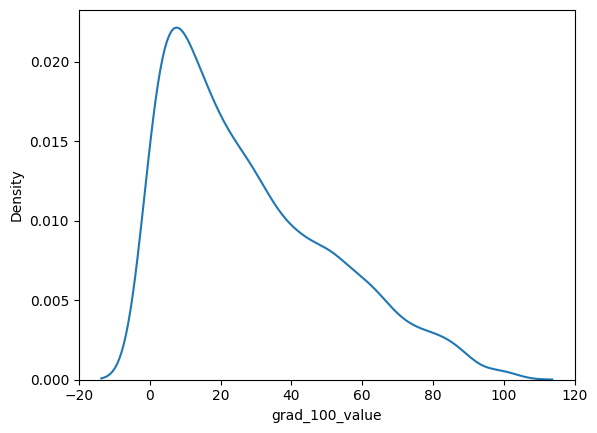

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


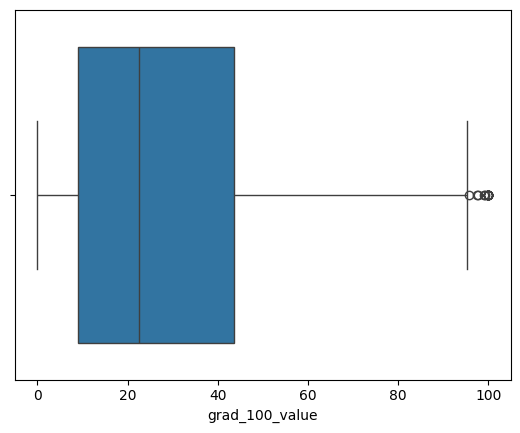

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [56]:
sns.histplot(data1['grad_100_value'])
plt.show()

sns.kdeplot(data1['grad_100_value'])
plt.show()

sns.boxplot(data = data1, x = 'grad_100_value')
plt.show()

print(data1['grad_100_value'].describe())

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


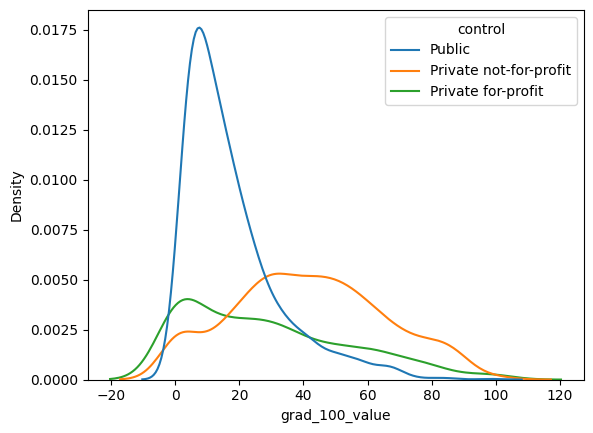

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


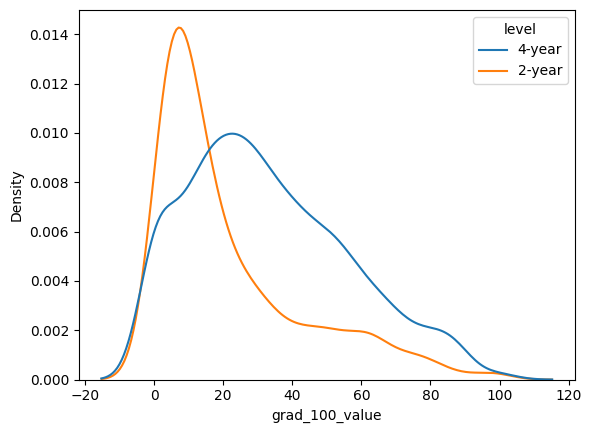

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

In [57]:
sns.kdeplot(data = data1, x = 'grad_100_value', hue = 'control')
plt.show()
sns.kdeplot(data = data1, x = 'grad_100_value', hue = 'level')
plt.show()
# both look like flattened bell curves, some (control private for profit and level 4 year) have higher densities on one end of the platuae.

data1.loc[:, ['control', 'grad_100_value']].groupby('control').describe()


In [58]:
data1.loc[:, ['level', 'grad_100_value']].groupby('level').describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


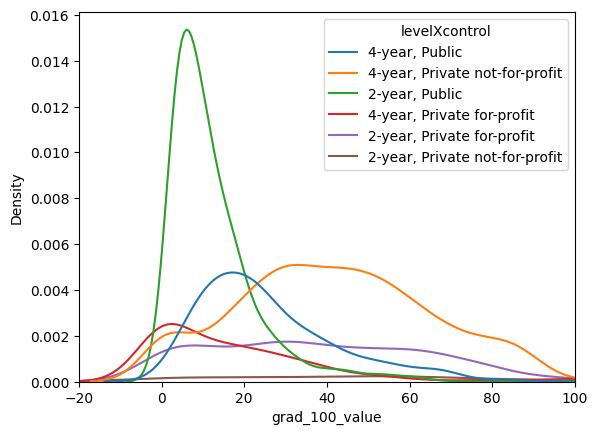

grad_100_value                             \
                                       count       mean        std  min   
level  control                                                            
2-year Private for-profit              461.0  37.197614  25.497380  0.0   
       Private not-for-profit           68.0  41.913235  28.348302  0.0   
       Public                          926.0  12.400000  10.893600  0.0   
4-year Private for-profit              318.0  17.382704  20.788525  0.0   
       Private not-for-profit         1121.0  41.645674  23.243453  0.0   
       Public                          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
level  control                                              
2-year Private for-profit      15.800  33.9  57.800  100.0  
       Private not-for-profit  16.225  44.4  61.200  100.0  
       Public                   5.100   9.4  16.175   97.8  
4-year Private for-profit       0.000  12.5  26.325  100.0  
       Private not-for-profit  25.000  41.0  57.800  100.0  
       Public                  13.600  21.8  33.800   86.3

In [59]:
data1['levelXcontrol'] = data1['level'] + ', ' + data1['control']

sns.kdeplot(data = data1, x = 'grad_100_value', hue = 'levelXcontrol')
plt.xlim(-20, 100)
plt.show()

data1.loc[:, ['level', 'control', 'grad_100_value']].groupby(['level', 'control']).describe()

# from the group kde plot and table it seems like 2 and 4 year private not for profit schools have the best graduation rates,
# while 2 year public has by far the worst graduation rate. 2 year private for profit is an easy third place for graduation rates,
# and it is about 2 times that of its counterpart 4 year private for profit.

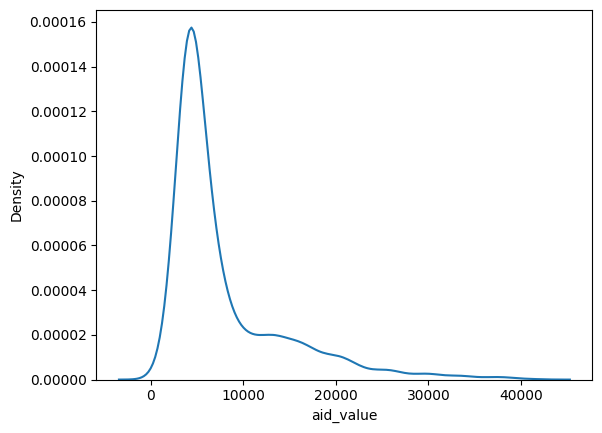

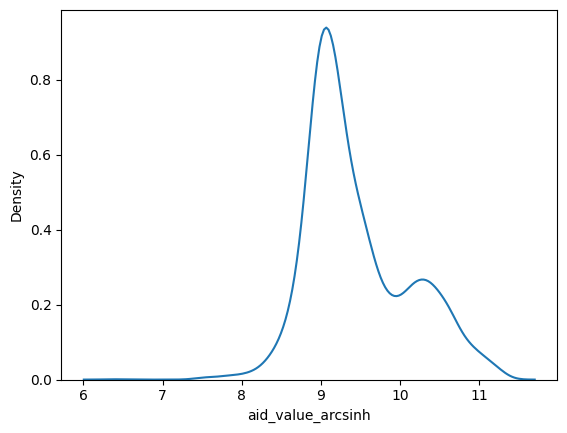

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


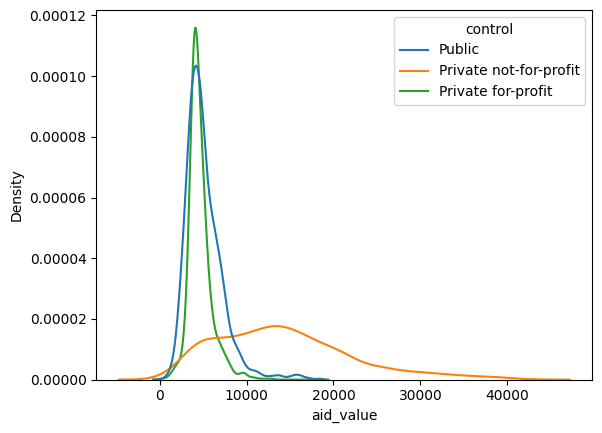

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


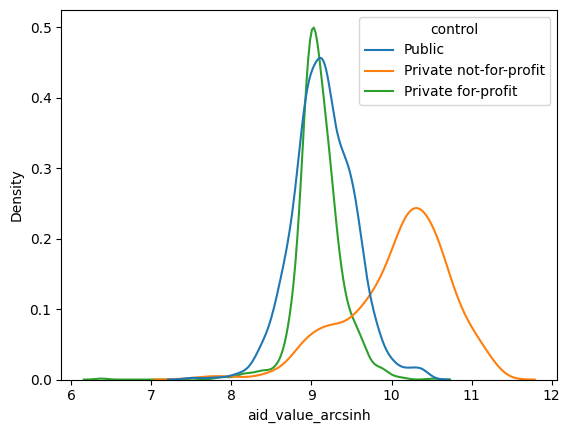

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


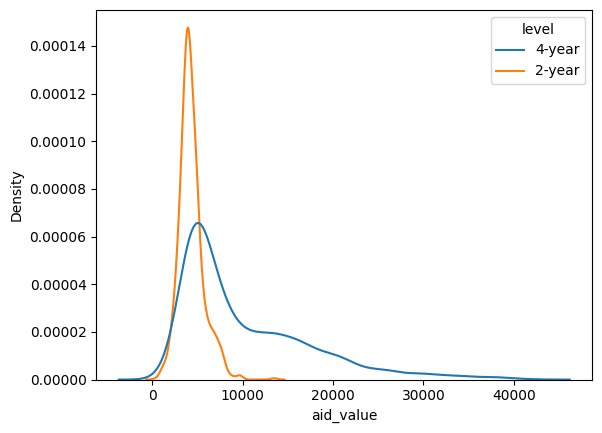

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


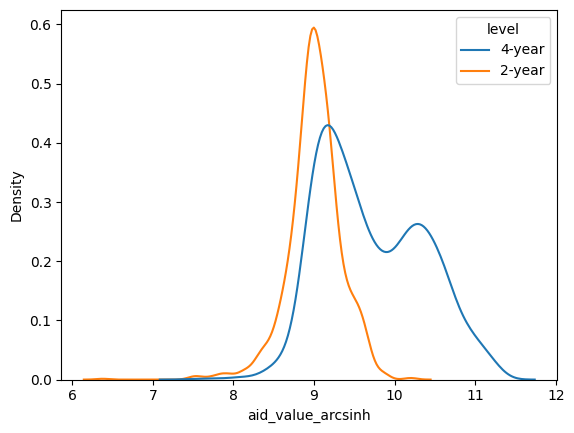

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

In [60]:
sns.kdeplot(data = data1, x = 'aid_value')
plt.show()

data1['aid_value_arcsinh'] = np.arcsinh(data1['aid_value'])
sns.kdeplot(data = data1, x = 'aid_value_arcsinh')
plt.show()

sns.kdeplot(data = data1, x = 'aid_value', hue = 'control')
plt.show()
sns.kdeplot(data = data1, x = 'aid_value_arcsinh', hue = 'control')
plt.show()

sns.kdeplot(data = data1, x = 'aid_value', hue = 'level')
plt.show()
sns.kdeplot(data = data1, x = 'aid_value_arcsinh', hue = 'level')
plt.show()

# graphs are pretty pointy (lessens when we use the arcsinh aid_value), there are a few noticable smaller humps
# but those are much easier to see when we use the arcsinh aid_value. Density for normal aid_value is very low


data1.loc[:, ['level', 'aid_value']].groupby('level').describe()


In [61]:
data1.loc[:, ['control', 'aid_value']].groupby('control').describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

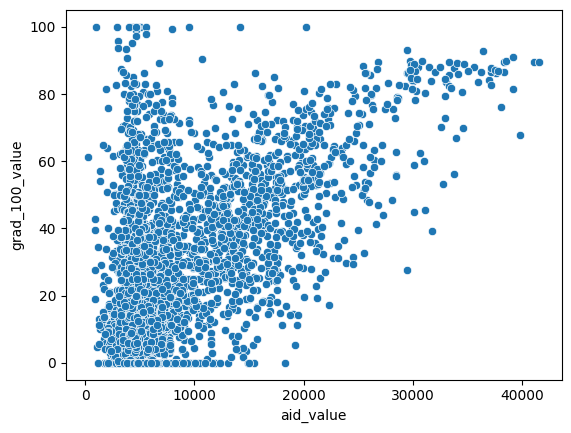

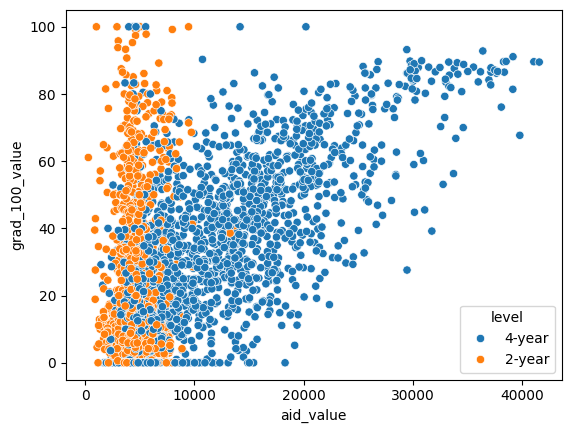

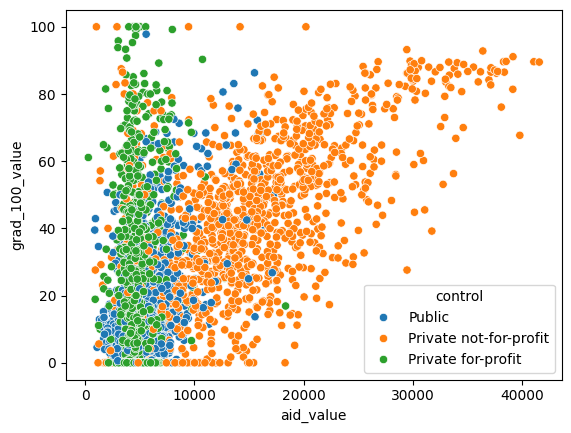

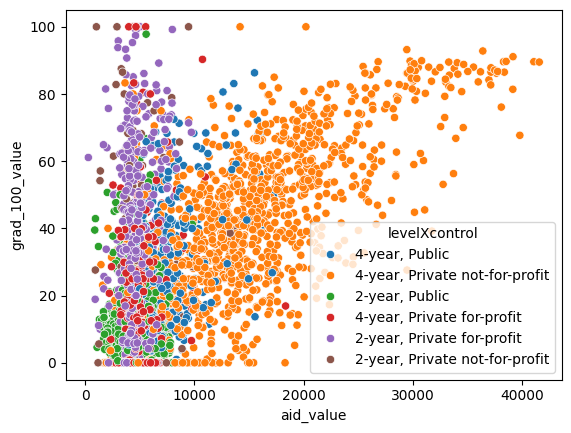

In [62]:
sns.scatterplot(data = data1, x = 'aid_value', y = 'grad_100_value')
plt.show()

# looks like the top of the letter k, seems to be a somewhat linear relationship as well as a very large spike
# at around 5000 aid_value

sns.scatterplot(data = data1, x = 'aid_value', y = 'grad_100_value', hue = 'level')
plt.show()
# this hue gives lots of clarity on the graph, as I assumed earlier there are two main relationships: linear for 4 year
# and a spike for 2 year

sns.scatterplot(data = data1, x = 'aid_value', y = 'grad_100_value', hue = 'control')
plt.show()
# this hue also gives clarity, again there is a more linear looking relation for private not for profit, and the spike is private for profit.
# additionally, there is the public variable which seems to be somewhat blob like. given how densely packed that lower left corner
# of the graph is I can see how there would be a third relationship kind of blending into the middle of the other two.

sns.scatterplot(data = data1, x = 'aid_value', y = 'grad_100_value', hue = 'levelXcontrol')
plt.show()

# It seems that increased aid for 4 year school, especially private not for profit,  increases graduation rate.


**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [5]:
# 1. I downloaded the suggested data
# 2. The data dictionary on occasion will have a certain number to indicate if the response was unknown. Some variables do noth have this option though.
  # in the notes section of the dictionary it will also say if all respondents answers were included, which can five us insight if not all answers
  # are included.

# 3. The two interesting variables I want to study are race/ethnicity age group (DEM_RE_AGE) and total office visits in current year (ADM_H_PHYEVT).
  # I think the total office visits gives a good base for lots of trends, and I think the race/ethinicity age group really helps to break the data
  # into specific categories that will (hopefully) result in clear patterns. I pulled all of this from the fall file.

data4 = pd.read_csv('https://raw.githubusercontent.com/vrhughes/visualization/main/fall2021.csv', low_memory = False)

race = data4['DEM_RE_AGE']
visits = data4['ADM_H_PHYEVT']
# Analyzing cleanliness of data
print(race.value_counts(), '\n')
print(visits.value_counts(), '\n')
# There are no null values in the data and they are already numbers so I consider
# this clean, also all values correspond to the dicitonary.

DEM_RE_AGE
2     3351
3     3338
4     1455
1     1323
11     619
10     507
5      409
6      395
14     300
7      276
9      270
13     255
12     154
8      131
Name: count, dtype: int64 

ADM_H_PHYEVT
0    7090
1    2286
2    1623
3     816
4     485
5     483
Name: count, dtype: int64 



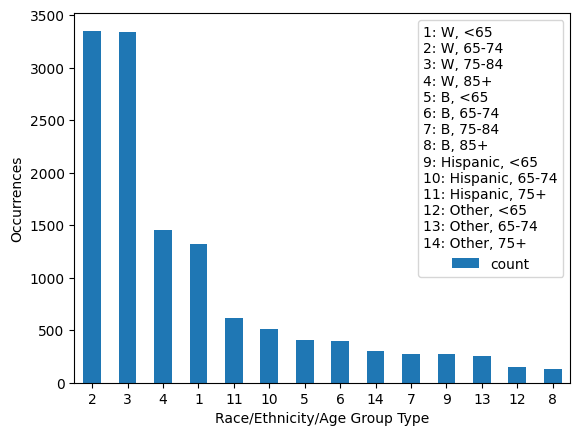

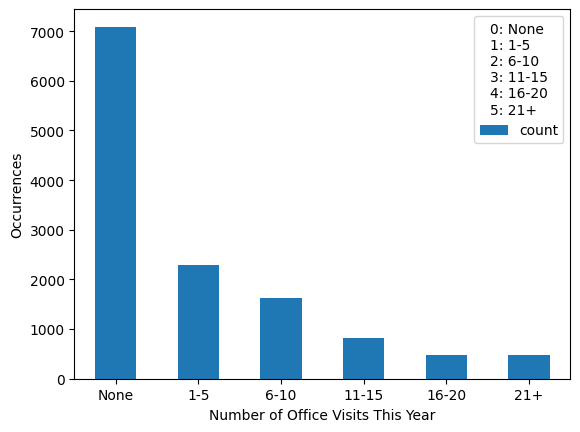

In [25]:
# 4
# Making a bar plot for each variable
race.value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('Race/Ethnicity/Age Group Type')
plt.ylabel('Occurrences')
plt.legend(title='1: W, <65\n2: W, 65-74\n3: W, 75-84\n4: W, 85+\n5: B, <65\n6: B, 65-74\n7: B, 75-84\n8: B, 85+\n9: Hispanic, <65\n10: Hispanic, 65-74\n11: Hispanic, 75+\n12: Other, <65\n13: Other, 65-74\n14: Other, 75+')
plt.show()
# types 2 and 3 make up the largest portion of the data and correlate to Non-Hispanic white, 65-74 years
    # and Non-Hispanic white, 75-84 years.

visits.value_counts().plot(kind = 'bar').set_xticklabels(['None', '1-5', '6-10', '11-15', '16-20', '21+'])
plt.xticks(rotation = 0)
plt.xlabel('Number of Office Visits This Year')
plt.ylabel('Occurrences')
plt.legend(title='0: None\n1: 1-5\n2: 6-10\n3: 11-15\n4: 16-20\n5: 21+')

plt.show()


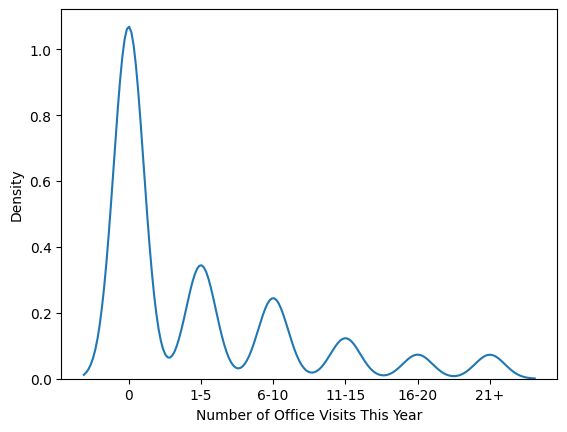

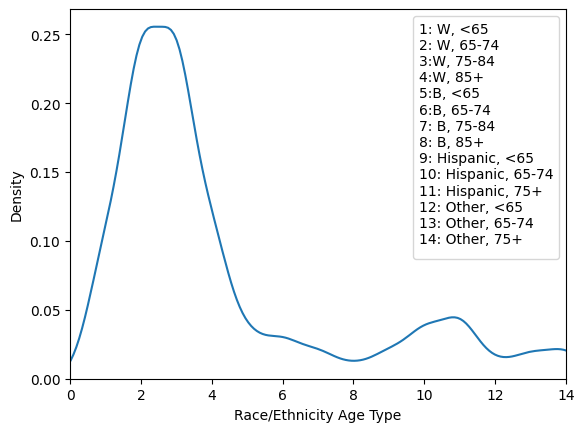

In [36]:
# 5
sns.kdeplot(data = data4, x = 'ADM_H_PHYEVT')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['0', '1-5', '6-10', '11-15', '16-20', '21+'])
plt.xlabel('Number of Office Visits This Year')
plt.show()
# 0 visits is most common, there seems to be a linear drop off from 1 to 3 visits,
# and 4+ visits seems to be more or less the same.

sns.kdeplot(data = data4, x = 'DEM_RE_AGE')
plt.xlabel('Race/Ethnicity Age Type')
plt.xlim(0,14)
plt.legend(title='1: W, <65\n2: W, 65-74\n3:W, 75-84\n4:W, 85+\n5:B, <65\n6:B, 65-74\n7: B, 75-84\n8: B, 85+\n9: Hispanic, <65\n10: Hispanic, 65-74\n11: Hispanic, 75+\n12: Other, <65\n13: Other, 65-74\n14: Other, 75+')
plt.show()
# as the bar plot showed above the biggest portion of the dataset is from types 2 and 3,
# not much else is gained from this graph

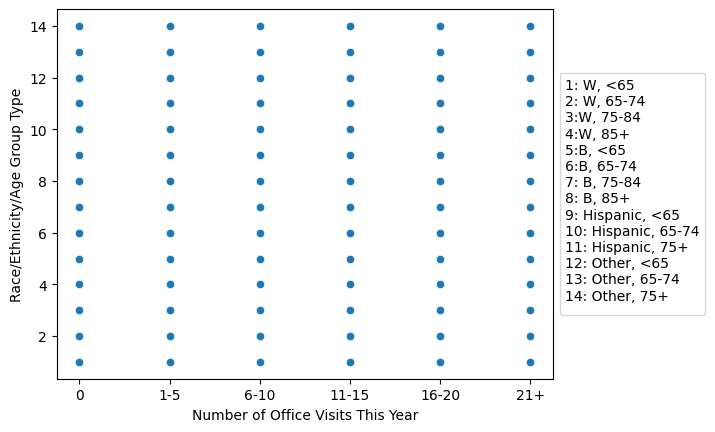

In [53]:
# 6
sns.scatterplot(data = data4, x = 'ADM_H_PHYEVT', y = 'DEM_RE_AGE')
plt.xlabel('Number of Office Visits This Year')
plt.ylabel('Race/Ethnicity/Age Group Type')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['0', '1-5', '6-10', '11-15', '16-20', '21+'])
plt.legend(title='1: W, <65\n2: W, 65-74\n3:W, 75-84\n4:W, 85+\n5:B, <65\n6:B, 65-74\n7: B, 75-84\n8: B, 85+\n9: Hispanic, <65\n10: Hispanic, 65-74\n11: Hispanic, 75+\n12: Other, <65\n13: Other, 65-74\n14: Other, 75+', loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

# since my data is all categorical is isn't really all that helpful to plot a scatterplot as it looks like a grid

ADM_H_PHYEVT     0    1    2    3    4    5
DEM_RE_AGE                                 
1              756  263  150   68   37   49
2             1731  731  458  195  119  117
3             1659  526  535  281  170  167
4              697  280  210  119   89   60
5              275   79   27   10   10    8
6              296   50   19   17    5    8
7              191   24   28   14   10    9
8               82   23   12    6    3    5
9              178   38   19   15    6   14
10             375   71   28   18    9    6
11             437   76   52   24   12   18
12              78   35   23   10    2    6
13             158   48   24   16    5    4
14             177   42   38   23    8   12 



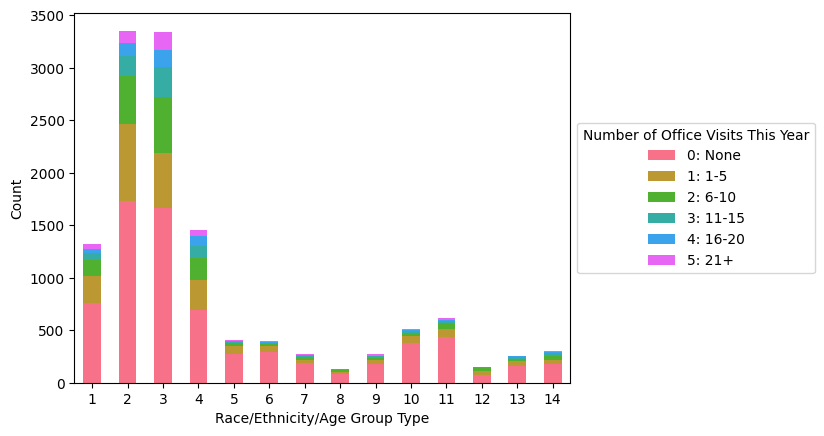

In [45]:
from operator import le
# 7
cross = pd.crosstab(race, visits)
print(cross, '\n')
# when doin gthis preliminary table it wasn't all that helpful so I tried to use a graph to help
# myself see what the big jumble was saying

boop = cross.plot.bar(rot=0, stacked=True, color=sns.husl_palette(len(cross.columns)))
plt.xlabel('Race/Ethnicity/Age Group Type')
legend_handles, _ = boop.get_legend_handles_labels()
boop.legend(legend_handles, ['0: None','1: 1-5','2: 6-10', '3: 11-15', '4: 16-20', '5: 21+'],
          title='Number of Office Visits This Year')

sns.move_legend(boop, "center left", bbox_to_anchor=(1, 0.5))
plt.ylabel('Count')
plt.show()
# due to the difference in how much data was collected for each group (which became very apparaent in
# all bar graphs) I realized I must normalize my data set so I can more clearly see the patterns

ADM_H_PHYEVT         0         1         2         3         4         5
DEM_RE_AGE                                                              
1             0.571429  0.198791  0.113379  0.051398  0.027967  0.037037
2             0.516562  0.218144  0.136676  0.058192  0.035512  0.034915
3             0.497004  0.157579  0.160276  0.084182  0.050929  0.050030
4             0.479038  0.192440  0.144330  0.081787  0.061168  0.041237
5             0.672372  0.193154  0.066015  0.024450  0.024450  0.019560
6             0.749367  0.126582  0.048101  0.043038  0.012658  0.020253
7             0.692029  0.086957  0.101449  0.050725  0.036232  0.032609
8             0.625954  0.175573  0.091603  0.045802  0.022901  0.038168
9             0.659259  0.140741  0.070370  0.055556  0.022222  0.051852
10            0.739645  0.140039  0.055227  0.035503  0.017751  0.011834
11            0.705977  0.122779  0.084006  0.038772  0.019386  0.029079
12            0.506494  0.227273  0.149351  0.06493

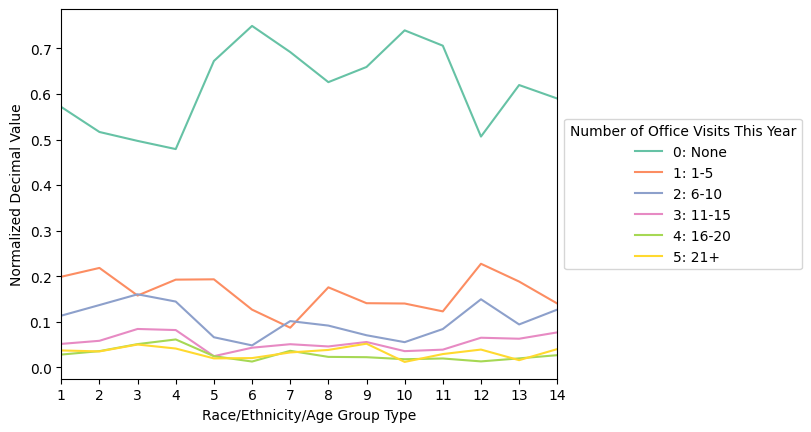

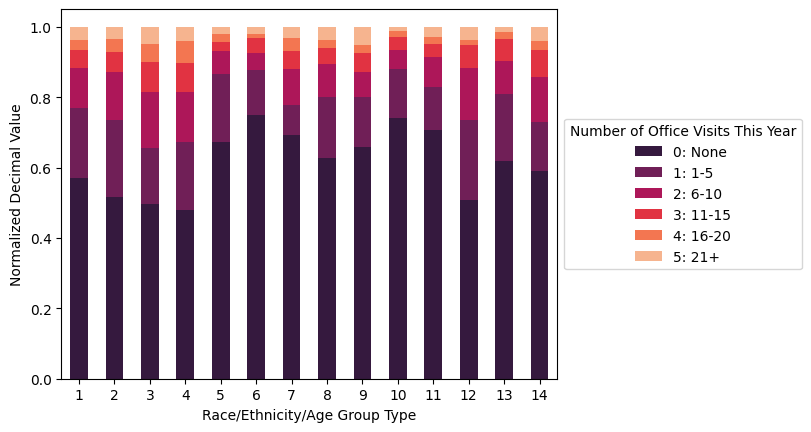

In [49]:
cross_norm = pd.crosstab(race, visits, normalize = 'index')
print(cross_norm, '\n')
# this cross table is much better in my opinion, because the normalization allows me to
# better understand how the race age types compare since there is such a discrepancy in
# how much data was collected on each group. I added the graphs as well to help me visualize
# since the table was so large. All in all we can see that white respondednts are most likely
# to have at least one office visit a year as opposed to none. Additionally, we can see that the
# group most likely to visit the most is group 9, hispanic people under the age of 65, followed by
# group 3 (white, 75-84). I think this is a great starting point for more analysis on this data.

ax = cross_norm.plot.line(rot=0, stacked=False, color=sns.color_palette("Set2"))
plt.xlabel('Race/Ethnicity/Age Group Type')
plt.margins(x=0)
x = np.arange(1, 15, 1)
plt.xticks(x)
legend_handles, _ = ax.get_legend_handles_labels()
ax.legend(legend_handles, ['0: None','1: 1-5','2: 6-10', '3: 11-15', '4: 16-20', '5: 21+'],
          title='Number of Office Visits This Year')

sns.move_legend(ax, "center left", bbox_to_anchor=(1, 0.5))
plt.ylabel('Normalized Decimal Value')
plt.show()

boop2 = cross_norm.plot.bar(rot=0, stacked=True, color=sns.color_palette("rocket"))
plt.xlabel('Race/Ethnicity/Age Group Type')
plt.ylabel('Normalized Decimal Value')
legend_handles, _ = boop2.get_legend_handles_labels()
boop2.legend(legend_handles, ['0: None','1: 1-5','2: 6-10', '3: 11-15', '4: 16-20', '5: 21+'],
          title='Number of Office Visits This Year')

sns.move_legend(boop2, "center left", bbox_to_anchor=(1, 0.5))
plt.show()